In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [13]:
ds1 = pd.read_csv('../../Class/machine-learning-june-2018/Class8/mushrooms.csv')
ds1.head(n=5)

,type,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [14]:
for ix in ds1:
    ds1[ix] = [ ord(x) - 96 for x in ds1[ix] ]
ds1.head()

,type,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,16,24,19,14,20,16,6,3,14,11,...,19,23,23,16,23,15,16,11,19,21
1,5,24,19,25,20,1,6,3,2,11,...,19,23,23,16,23,15,16,14,14,7
2,5,2,19,23,20,12,6,3,2,14,...,19,23,23,16,23,15,16,14,14,13
3,16,24,25,23,20,16,6,3,14,14,...,19,23,23,16,23,15,16,11,19,21
4,5,24,19,7,6,14,6,23,2,11,...,19,23,23,16,23,15,5,14,1,7


In [15]:
data1 = ds1.values
print data1.shape
x_train1 = data1[:6000,1:]
y_train1 = data1[:6000,0]
x_test1 = data1[6000:,1:]
y_test1 = data1[6000:,0]
print x_train1.shape
print y_train1.shape
print x_test1.shape
print x_test1.shape

(8124, 23)
(6000, 22)
(6000,)
(2124, 22)
(2124, 22)


In [16]:
rf = RandomForestClassifier()
rf.fit(x_train1,y_train1)
print rf.score(x_test1,y_test1)

0.8088512241054614


In [18]:
dt = DecisionTreeClassifier()
dt.fit(x_train1,y_train1)
print dt.score(x_test1,y_test1)

0.96045197740113


In [19]:
data = ds1.values
my_model1 = PCA(n_components=5)
ds2 = my_model1.fit_transform(ds1)
x1 = []
for ix in ds1:
    x1.append(ix)
print my_model1.components_.shape
print my_model1.explained_variance_
print my_model1.explained_variance_ratio_
print my_model1.explained_variance_ratio_.cumsum()

(5, 23)
[386.23881852 104.7396345   98.27961777  84.19971541  75.24646149]
[0.37019474 0.10038883 0.09419715 0.08070212 0.07212078]
[0.37019474 0.47058356 0.56478072 0.64548284 0.71760362]


In [21]:
my_model2 = PCA(n_components=10)
x_train2 = my_model2.fit_transform(x_train1)
x_test2 = my_model2.transform(x_test1)
print x_train2.shape
print x_test2.shape

(6000, 10)
(2124, 10)


In [22]:
rf = RandomForestClassifier()
rf.fit(x_train2,y_train1)
print rf.score(x_test2,y_test1)

0.8432203389830508


In [23]:
x_points1 = []
y_points1 = []
for ix in range(1,x_train1.shape[1]+1):
    x_points1.append(ix)
    my_model2 = PCA(n_components=ix)
    x_train2 = my_model2.fit_transform(x_train1)
    x_test2 = my_model2.transform(x_test1)
    rf = RandomForestClassifier()
    rf.fit(x_train2,y_train1)
    y_points1.append(rf.score(x_test2,y_test1))
print x_points1
print y_points1

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
[0.3182674199623352, 0.5616760828625236, 0.6789077212806026, 0.7900188323917138, 0.5725047080979284, 0.4265536723163842, 0.4505649717514124, 0.8884180790960452, 0.9218455743879472, 0.846045197740113, 0.8653483992467044, 0.9241996233521658, 0.8808851224105462, 0.8173258003766478, 0.8606403013182674, 0.903954802259887, 0.9190207156308852, 0.742467043314501, 0.7923728813559322, 0.8479284369114878, 0.7994350282485876, 0.7052730696798494]


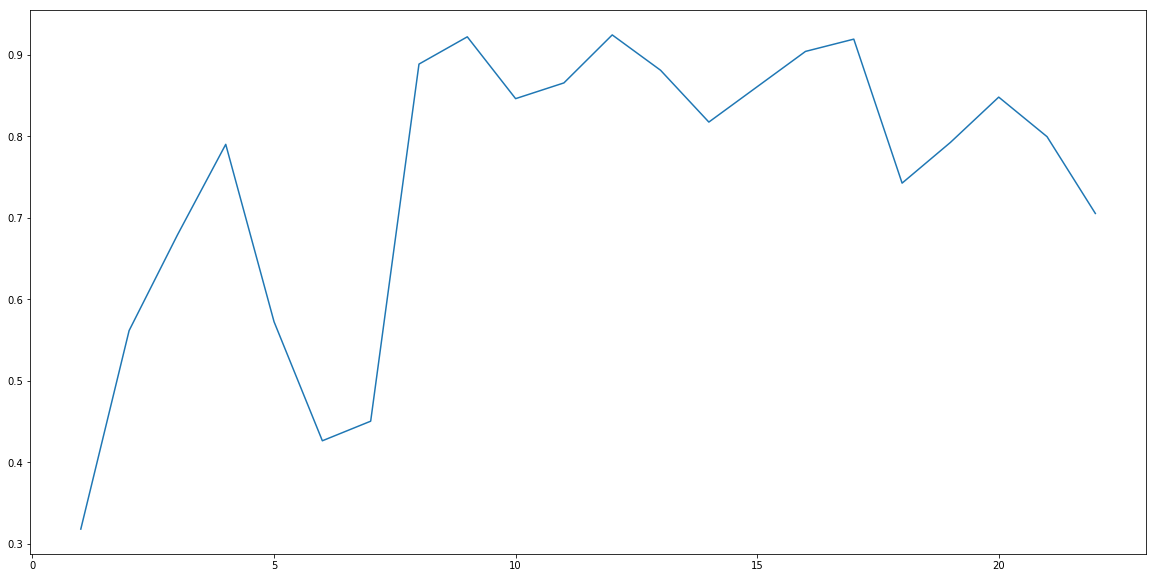

In [24]:
plt.rcParams["figure.figsize"] = (20,10)
plt.plot(x_points1,y_points1)

In [26]:
ds2_train = pd.read_csv('../../ClassMyCode/fashionmnist/fashion-mnist_train.csv')
ds2_test = pd.read_csv('../../ClassMyCode/fashionmnist/fashion-mnist_test.csv')
ds2_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
print ds2_train.shape
print ds2_test.shape

(60000, 785)
(10000, 785)


In [28]:
data_train2 = ds2_train.values
data_test2 = ds2_test.values
x_train3 = data_train2[:1000,1:]
y_train3 = data_train2[:1000,0]
x_test3 = data_test2[:100,1:]
y_test3 = data_test2[:100,0]

In [29]:
my_model2 = PCA()
my_model2.fit(x_train3)
cumsum1 = my_model2.explained_variance_ratio_.cumsum()
print cumsum1.shape
x_points2 = []
y_points2 = []
for ix in range(1,cumsum1.shape[0]):
    x_points2.append(ix)
    y_points2.append(cumsum1[ix])

(784,)


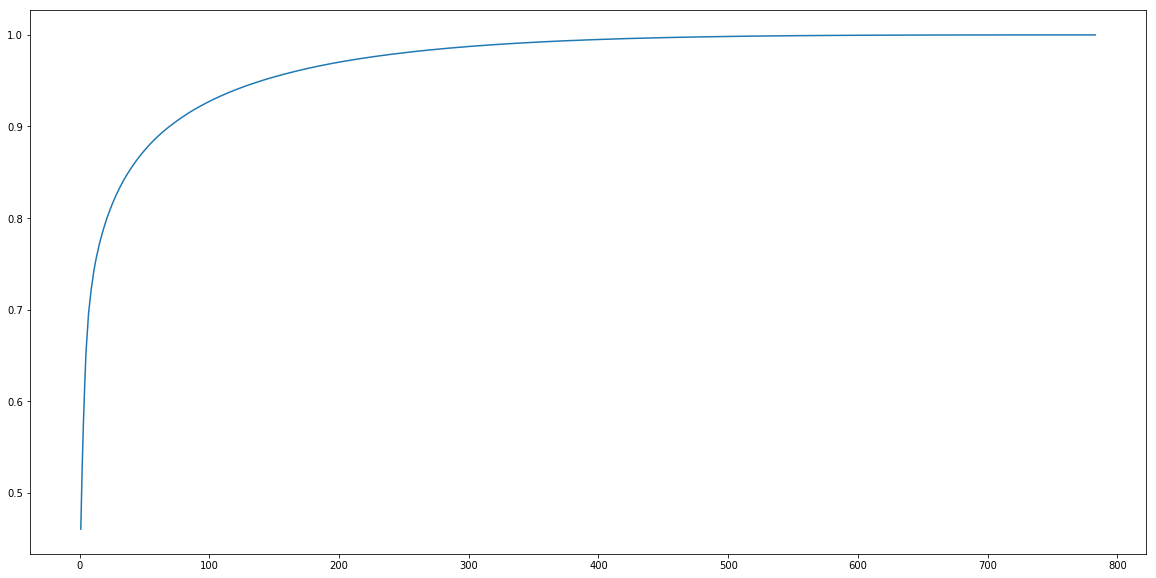

In [30]:
plt.plot(x_points2,y_points2)